# Assignment: Introduction to Neural Networks with Keras in Python

## Objective
The goal of this assignment is to introduce you to the fundamentals of building, training, and evaluating a neural network using Keras in Python. By the end of this assignment, you will have implemented a simple neural network to solve a binary classification problem.

In [ ]:
# pip install tensorflow

## Step 1: Import Necessary Libraries

In [19]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### Explanation:
- `numpy`: For numerical operations.
- `train_test_split`: To split the data into training and testing sets.
- `StandardScaler`: To normalize the input data.
- `make_classification`: To generate a synthetic binary classification dataset.
- Keras components: To build and train the neural network.

## Step 2: Generate and Preprocess Data

In [22]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Explanation:
- `make_classification`: Creates a synthetic binary classification dataset with 20 features, where 15 are informative and 5 are redundant.
- `train_test_split`: Splits data into 80% training and 20% testing.
- `StandardScaler`: Normalizes the input features for faster and more stable training.

## Step 3: Build the Neural Network

In [23]:
# Initialize the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

### Explanation:
- `Sequential`: Creates a linear stack of layers.
- `Dense`: Fully connected layers with specified number of neurons and activation functions.
- `relu`: Rectified Linear Unit activation function for hidden layers.
- `sigmoid`: Used for binary classification in the output layer.
- `binary_crossentropy`: Loss function for binary classification tasks.
- `Adam`: Optimizer for adjusting weights during training.

## Step 4: Train the Neural Network

In [27]:
# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6745 - loss: 0.6331 - val_accuracy: 0.8125 - val_loss: 0.4868
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8329 - loss: 0.4426 - val_accuracy: 0.8813 - val_loss: 0.3799
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9137 - loss: 0.3146 - val_accuracy: 0.9000 - val_loss: 0.3157
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9240 - loss: 0.2409 - val_accuracy: 0.9187 - val_loss: 0.2650
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9348 - loss: 0.2076 - val_accuracy: 0.9125 - val_loss: 0.2378
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9559 - loss: 0.1642 - val_accuracy: 0.9125 - val_loss: 0.2261
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9464 - loss: 0.1733 - val_accuracy: 0.9250 - val_loss: 0.2045
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9780 - loss: 0.1228 - val_accuracy: 0.9312 - v

### Explanation:
- `validation_split`: Reserves 20% of the training data for validation.
- `epochs`: Number of training iterations.
- `batch_size`: Number of samples processed before updating model weights.
- `verbose`: Displays training progress.

## Step 5: Evaluate the Model

In [29]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9466 - loss: 0.1343  
Test Loss: 0.1348
Test Accuracy: 0.9500


### Explanation:
- `evaluate`: Computes loss and accuracy on the test set.

## Step 6: Visualize Training Performance

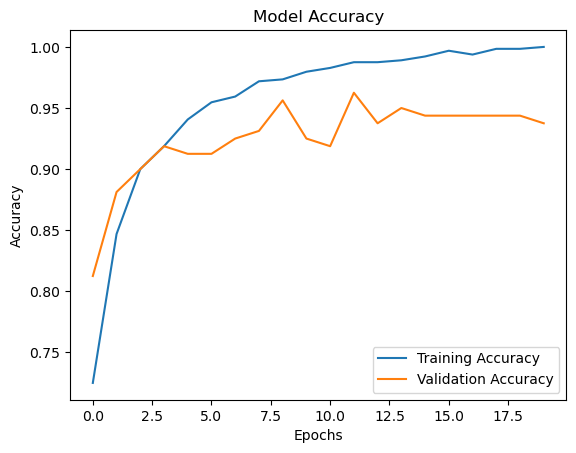

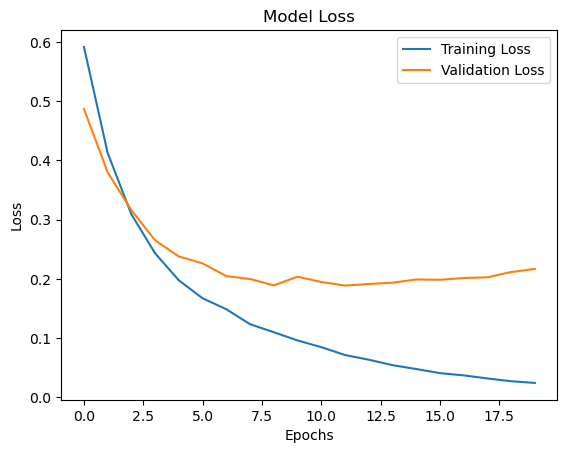

In [31]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Explanation:
- `matplotlib`: Used to visualize training and validation performance over epochs.

## Step 7: Make Predictions

In [33]:
# Make predictions on the test set
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Print a few predictions
print("Predictions:", predictions[:10].flatten())
print("Actual Labels:", y_test[:10])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions: [0 1 0 0 1 1 1 0 1 0]
Actual Labels: [0 1 1 0 1 1 1 0 1 0]


### Explanation:
- `model.predict`: Generates predictions for the test set.
- Threshold `0.5`: Converts probabilities into binary class labels (0 or 1).